#This notebook walks through how to build a simple Convolutional Network and then a VGG16 based CNN for predicting Dogs vs Cats Labels.

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



If using GPU run the below

In [17]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: ignored

##Data Preperation

In [ ]:
###Importing zipped images as unzipped

#'/content/drive/MyDrive/Deep Learning Projects/archive (24).zip'

# !unzip -uq '/content/drive/MyDrive/Deep Learning Projects/archive (24).zip' -d "/content/drive/MyDrive/Deep Learning Projects/unzipped_dogs_vs_cats"

In [25]:
#organizing data into train, valid and test sets
os.chdir('/content/drive/MyDrive/Deep Learning Projects/dogs vs cats')
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'), 500):
  shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
  shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
  shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
  shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
  shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
  shutil.move(c, 'test/dog')

  
os.chdir('../../')

In [27]:
train_path = '/content/drive/MyDrive/Deep Learning Projects/dogs vs cats/train'
valid_path = '/content/drive/MyDrive/Deep Learning Projects/dogs vs cats/valid'
test_path = '/content/drive/MyDrive/Deep Learning Projects/dogs vs cats/test'

###Image Preprocessing

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224,224), classes = ['cat', 'dog'],batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224,224), classes = ['cat', 'dog'],batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224,224), classes = ['cat', 'dog'],batch_size=10, shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [31]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100


assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [33]:
imgs, labels = next(train_batches)

In [34]:
#plotting images in form of a grid

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

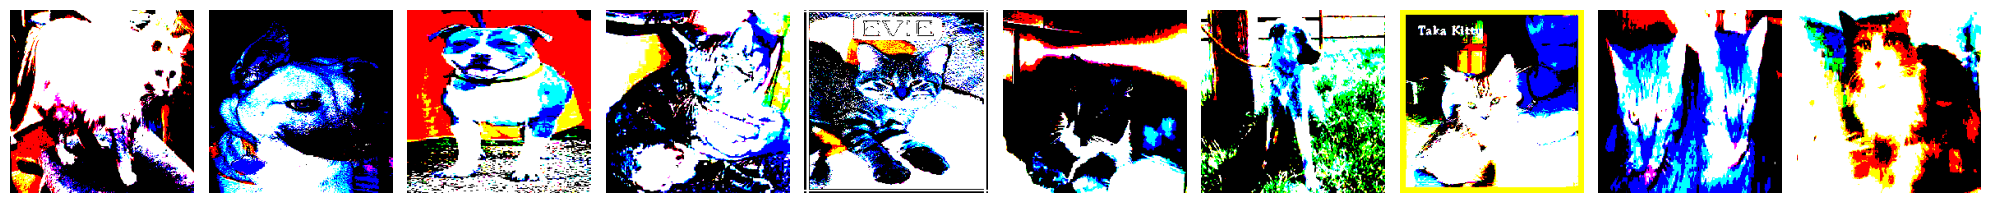

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [35]:
plotImages(imgs)
print(labels)

##Building the CNN network

In [40]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu', padding='same', input_shape=(224,224, 3)), #standard convolutional layer that takes image data
    MaxPool2D(pool_size=(2,2), strides=2), #cuts our image dimnesions in half
    Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'), #filters are arbitrary but common practices to use a mutltiple of previous layer
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), #flattens into 1 dimensional tensor before passing into output layer
    Dense(units=2, activation='softmax') #2 nodes corresponding to cats and dogd
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

#Training the model

In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [45]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2) 

Epoch 1/10
100/100 - 263s - loss: 17.9478 - accuracy: 0.5420 - val_loss: 5.9548 - val_accuracy: 0.5750 - 263s/epoch - 3s/step
Epoch 2/10
100/100 - 104s - loss: 2.4987 - accuracy: 0.7490 - val_loss: 3.6083 - val_accuracy: 0.5700 - 104s/epoch - 1s/step
Epoch 3/10
100/100 - 98s - loss: 0.8039 - accuracy: 0.8590 - val_loss: 2.6435 - val_accuracy: 0.6250 - 98s/epoch - 979ms/step
Epoch 4/10
100/100 - 95s - loss: 0.1495 - accuracy: 0.9590 - val_loss: 2.4328 - val_accuracy: 0.6250 - 95s/epoch - 954ms/step
Epoch 5/10
100/100 - 123s - loss: 0.0537 - accuracy: 0.9860 - val_loss: 3.2047 - val_accuracy: 0.5800 - 123s/epoch - 1s/step
Epoch 6/10
100/100 - 121s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 2.3650 - val_accuracy: 0.6400 - 121s/epoch - 1s/step
Epoch 7/10
100/100 - 102s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.3265 - val_accuracy: 0.6550 - 102s/epoch - 1s/step
Epoch 8/10
100/100 - 102s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2422 - val_accuracy: 0.6400 - 102s/epoch - 1s/st

##Prediction

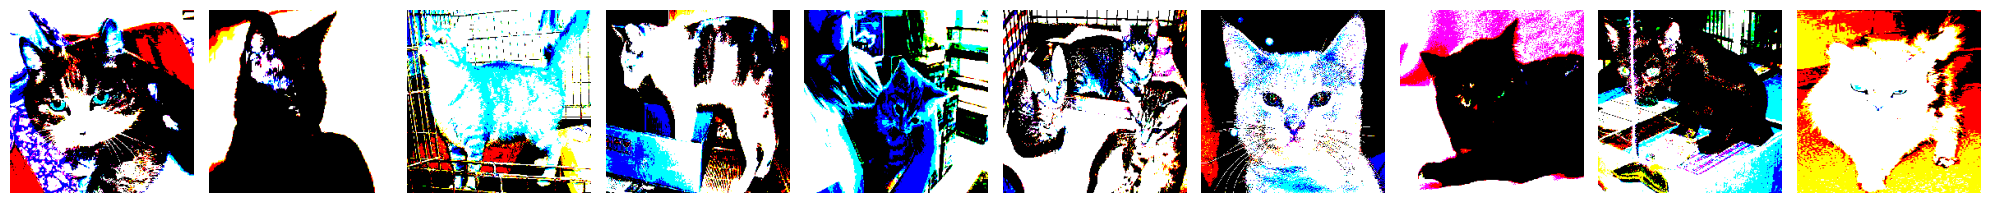

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [48]:
 #notice there is no need to specify labels. Train batches was assigned a generator whihc contains the lables within

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [49]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
predictions = model.predict(test_batches, verbose=0)

In [52]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [54]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(predictions, axis=-1))

In [55]:
def plot_confusion_matrix(
    cm, classes,
    normalize=False,
    title='Confusiion Matrix',
    cmap=plt.cm.Blues):
  
  
  """
  This function plits the confusion matrix.
  Normalization can be applied when set to True
  """

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusiion Matrix')
  else:
    print('Confusion Matrix Without Normalization')
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

In [56]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix Without Normalization
[[31 19]
 [23 27]]


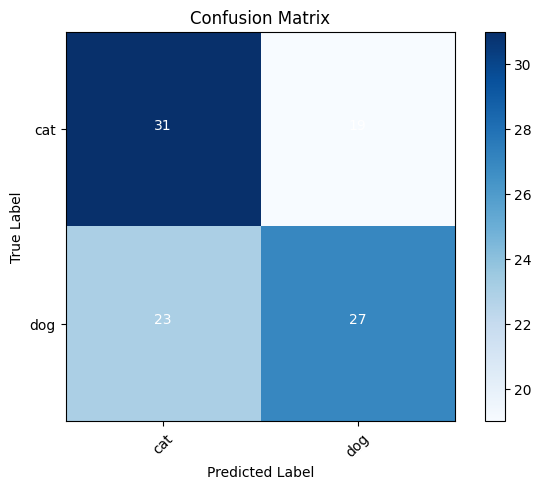

In [57]:
cm_plot_labels = ['cat','dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

##Using VGG16 fine tuned model

VGG16 subtracts the mean of rgb from the training set

In [58]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [60]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [67]:
type(vgg16_model)

keras.engine.functional.Functional

In [70]:
#I need to reduce the number of outputs from 1000 to 2 in the output layer

#we are not ready to work on a fucntional model so we need to create a sequential version

model = Sequential()

for layer in vgg16_model.layers[:-1]: #all layers except last output layer
  model.add(layer)


In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

The architecture of this model is the same as our initial VGG16 model minus the output layer and this one is Sequentital

In [72]:
#freezes wieght and biases form all the layers from being retrained. VGG16 is already pretrained.

for layer in model.layers:
  layer.trainable = False

In [73]:
#adding our own output layer since we excluded the original

model.add(Dense(units=2, activation='softmax')) #the only trainable layer

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

###Training Sequential VGG16 with our Data

In [76]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [77]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 774s - loss: 0.2711 - accuracy: 0.8820 - val_loss: 0.0837 - val_accuracy: 0.9700 - 774s/epoch - 8s/step
Epoch 2/5
100/100 - 686s - loss: 0.0645 - accuracy: 0.9740 - val_loss: 0.0676 - val_accuracy: 0.9700 - 686s/epoch - 7s/step
Epoch 3/5
100/100 - 713s - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0572 - val_accuracy: 0.9750 - 713s/epoch - 7s/step
Epoch 4/5
100/100 - 718s - loss: 0.0282 - accuracy: 0.9930 - val_loss: 0.0517 - val_accuracy: 0.9800 - 718s/epoch - 7s/step
Epoch 5/5
100/100 - 711s - loss: 0.0208 - accuracy: 0.9980 - val_loss: 0.0486 - val_accuracy: 0.9850 - 711s/epoch - 7s/step


This model is much better at generalizing compared to the simple model

###Predictions

In [85]:
predictions = model.predict(x=test_batches, verbose=0)

In [86]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [87]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(predictions, axis=-1))

Confusion Matrix Without Normalization
[[48  2]
 [ 2 48]]


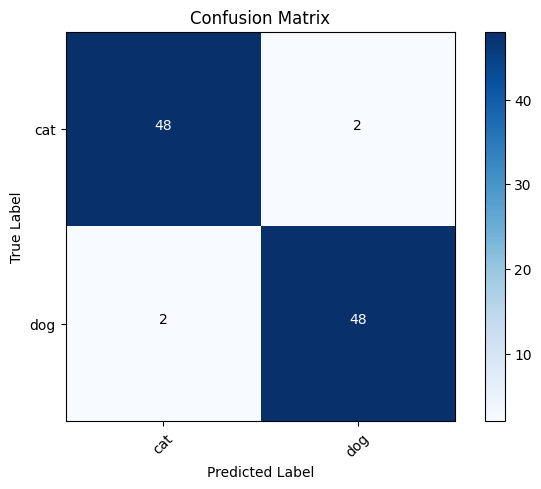

In [88]:
cm_plot_labels = ['cat','dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#This model performed extraordinarily better than our simple mode. The previous model had an accuracy of .50 after 10 epochs while this one has and accuracy of .96 after only 5 epochs